# Multi-Disease Risk Reporting Data Analysis

## Introduction
We exploit the data sets processed by ```Data cleaning and transformation.ipynb``` and perform ```Statistical Analysis```, ```Machine Learning```, ```Risk Scoring Models```, and ```Literature Review```.

## Data Description
```Turkish transcriptomics.csv``` is the Turkish cohort, including healthy and unhealthy individuals.

```GTEx transcriptomics.csv``` is the GTEx cohort, only including healthy individuals [(GTEx's Download Webpage)](https://gtexportal.org/home/datasets).

```ibd_UC transcriptomics.csv``` is the ulcerative colitis cohort [(Data Set Download Webpage)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186507).

```ibd_CD transcriptomics.csv``` is the Crohn's disease cohort [(Data Set Download Webpage)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186507).

```ibd_Control transcriptomics.csv``` is the control cohort [(Data Set Download Webpage)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE186507).

```ibd_UC_test transcriptomics.csv``` is an independent test cohort [(Data Set Download Webpage)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE112057).

```ibd_CD_test transcriptomics.csv``` is an independent test cohort [(Data Set Download Webpage)](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE112057).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_Turkish = pd.read_csv('../Transcriptomics reporting/Turkish transcriptomics.csv', sep=',')
df_GTEx = pd.read_csv('../Transcriptomics reporting/GTEx transcriptomics.csv', sep=',')
df_ibd_Control = pd.read_csv('../Transcriptomics reporting/ibd_Control transcriptomics.csv', sep=',')
df_ibd_UC = pd.read_csv('../Transcriptomics reporting/ibd_UC transcriptomics.csv', sep=',')
df_ibd_CD = pd.read_csv('../Transcriptomics reporting/ibd_CD transcriptomics.csv', sep=',')

The number of genes from different data sets are slightly different. Therefore, we choose their gene intersection set for the downstreaming analysis.

In [3]:
gene_set_Turkish = set(df_Turkish.columns[1:])
gene_set_GTEx = set(df_GTEx.columns[1:])
gene_set_ibd = set(df_ibd_Control.columns[1:])  # Note that the gene sets for df_ibd_Control, df_ibd_UC, and df_ibd_CD are the same
gene_set_intersection = gene_set_Turkish.intersection(gene_set_GTEx, gene_set_ibd)
gene_list_intersection = sorted(gene_set_intersection)

In [4]:
df_Turkish_filtered = df_Turkish[['SampleID']+gene_list_intersection]
df_GTEx_filtered = df_GTEx[['SampleID']+gene_list_intersection]
df_ibd_Control_filtered = df_ibd_Control[['SampleID']+gene_list_intersection]
df_ibd_CD_filtered = df_ibd_CD[['SampleID']+gene_list_intersection]
df_concat = pd.concat([df_Turkish_filtered, df_GTEx_filtered, df_ibd_Control_filtered, df_ibd_CD_filtered], axis=0)
df_concat

,SampleID,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,P001_100,0.000000,0.876244,52.9349,3.704980,2.646180,0.105210,0.000000,9.637665,1.799260,...,4.223689,0.000000,3.49518,2.88582,36.78610,2.044554,20.777230,466.946680,24.911300,9.140012
1,P001_101,0.000000,0.229160,35.5261,1.012100,0.254526,0.000000,0.000000,1.413967,0.000000,...,0.991191,0.337798,1.89390,2.11117,7.12266,0.469697,5.649786,103.221300,8.499660,12.768635
2,P001_102,0.000000,0.597894,141.3611,1.848237,1.496530,0.614683,0.000000,5.598558,0.810282,...,2.905606,0.365529,4.62482,5.36743,30.77100,2.041550,17.758030,455.870460,21.398200,7.411158
3,P001_103,0.000000,0.543436,97.7551,3.629154,1.021290,0.000000,0.108403,9.306311,0.777092,...,5.094959,0.965666,5.37709,3.92983,33.83340,1.162940,19.598260,317.136378,24.197400,15.842987
4,P001_104,0.599048,0.847674,60.2554,4.428849,0.258472,1.163200,0.544093,11.172650,2.380570,...,4.307516,2.916108,3.71000,4.35419,29.89256,1.780078,17.824240,242.529080,22.970700,16.717230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,SRR18720381,0.000000,0.326404,73.2637,0.792461,0.000000,0.141917,0.000000,1.707948,1.067090,...,11.384623,2.244848,7.65364,2.77601,19.22170,1.480940,17.327640,5.157647,4.810420,30.269020
425,SRR18720382,0.000000,0.282728,87.5668,0.720071,0.000000,0.154394,0.000000,0.518711,0.324119,...,7.511994,2.641200,5.42881,1.99505,16.47840,0.673831,20.237860,7.892798,7.870130,22.687090
426,SRR18720386,0.120211,0.315464,51.8402,0.772513,0.000000,0.379738,0.063750,1.687220,1.207450,...,17.019993,2.009821,6.46757,2.83883,19.69451,0.571734,24.596550,9.460830,8.741827,26.767622
427,SRR18720387,0.000000,0.343542,50.3417,1.498679,0.149677,0.000000,0.078060,0.752680,0.270784,...,12.464745,2.090410,5.03728,2.60803,36.84640,0.959154,41.406600,23.019950,15.737584,26.456200


In [5]:
column_averages = df_concat.iloc[:,1:].mean()
filtered_columns = column_averages[column_averages > 10].index  # we only focus on genes with tpm>10
df_concat_filtered = pd.concat([df_concat.iloc[:,0] ,df_concat.iloc[:,1:][filtered_columns]], axis=1)
df_concat_filtered

,SampleID,A2M,AAGAB,AAK1,AAMDC,AAMP,AASDHPPT,AATF,AATK,ABCA1,...,ZRSR2,ZSCAN16,ZSCAN30,ZSWIM1,ZSWIM6,ZSWIM8,ZXDC,ZYG11B,ZYX,ZZEF1
0,P001_100,52.9349,13.013050,61.945350,23.073350,10.786120,10.79198,5.774231,80.405490,41.54662,...,22.043580,13.282206,35.640730,8.46885,26.82660,28.059500,36.78610,20.777230,466.946680,24.911300
1,P001_101,35.5261,3.586671,26.742090,7.514490,9.870260,9.72005,5.439460,7.123460,6.57208,...,9.930240,6.105710,13.971562,2.28779,7.13925,6.976848,7.12266,5.649786,103.221300,8.499660
2,P001_102,141.3611,11.943848,69.390970,37.339705,20.035370,13.52235,10.155829,48.970450,30.44594,...,18.053670,12.259500,29.390656,8.42451,21.21870,22.615314,30.77100,17.758030,455.870460,21.398200
3,P001_103,97.7551,13.728370,78.125380,25.019303,14.059360,10.10686,11.619253,29.118920,40.82072,...,15.203230,13.046800,39.372332,8.76960,20.76010,23.582710,33.83340,19.598260,317.136378,24.197400
4,P001_104,60.2554,14.052580,71.150770,31.571819,22.394845,17.16298,9.835809,31.902450,37.11206,...,10.112640,9.805380,31.664287,8.13025,18.10170,25.091624,29.89256,17.824240,242.529080,22.970700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,SRR18720381,73.2637,25.979720,17.054364,16.559270,22.859176,24.75342,13.114786,7.178477,20.52321,...,13.094400,19.239220,30.383821,9.40832,11.64150,9.738578,19.22170,17.327640,5.157647,4.810420
425,SRR18720382,87.5668,22.741240,13.212880,15.113490,48.460144,22.74303,15.877072,11.957050,38.60908,...,7.784620,18.741640,22.394682,8.39308,16.04810,18.194316,16.47840,20.237860,7.892798,7.870130
426,SRR18720386,51.8402,16.920300,26.653136,14.834186,17.699390,31.55950,9.581980,11.535213,39.11134,...,6.244310,14.117110,30.094378,5.52124,19.52400,8.382133,19.69451,24.596550,9.460830,8.741827
427,SRR18720387,50.3417,32.426080,31.872980,17.247730,31.928150,27.62452,11.968530,22.937100,107.44950,...,7.548812,12.721220,28.307539,12.61660,26.89750,23.327541,36.84640,41.406600,23.019950,15.737584


In [6]:
df_ibd_UC_filtered = df_ibd_UC[df_concat_filtered.columns]
df_ibd_UC_filtered

,SampleID,A2M,AAGAB,AAK1,AAMDC,AAMP,AASDHPPT,AATF,AATK,ABCA1,...,ZRSR2,ZSCAN16,ZSCAN30,ZSWIM1,ZSWIM6,ZSWIM8,ZXDC,ZYG11B,ZYX,ZZEF1
0,SRR18719361,36.08380,25.692170,21.644463,16.740946,41.012890,42.948200,12.371740,13.538880,31.50394,...,9.051440,18.79258,31.482110,32.57390,17.2626,8.124359,31.49630,28.64684,9.739370,6.211790
1,SRR18719364,99.95460,19.957127,29.502410,24.533886,43.354710,20.715040,13.528411,40.772325,77.25230,...,6.665336,15.69070,25.783480,15.36880,27.7198,28.027670,42.78610,25.16521,35.145630,20.014630
2,SRR18719365,51.38120,20.396760,17.969384,16.989892,54.524861,20.555640,9.704075,14.592868,81.77400,...,6.121162,15.58850,34.413113,12.04890,25.1713,23.187699,24.45569,29.72271,15.158000,11.818900
3,SRR18719369,28.37250,15.016020,16.358580,15.406119,27.680234,25.807110,13.518180,9.476816,34.54404,...,4.705848,13.95608,22.835549,19.48830,18.9964,10.606740,21.58418,23.65564,11.901690,7.111080
4,SRR18719370,108.81450,14.818030,22.696322,15.715870,24.326030,20.151590,9.928820,20.748620,41.49328,...,9.330740,13.96663,26.619898,22.70180,16.1295,10.641756,26.10778,22.06425,6.905669,9.257585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,SRR18720379,23.39000,23.011750,14.090954,14.492413,22.949923,23.269380,21.902610,9.098621,39.44887,...,8.899090,21.78125,26.484624,6.72033,15.4940,11.856050,22.06779,28.90950,7.216353,5.425515
374,SRR18720380,89.70230,22.637640,26.164097,17.442785,30.047649,20.416506,8.544648,18.977550,77.84510,...,10.616860,14.73240,34.492076,12.37890,26.8512,14.541725,40.01030,29.07856,19.917640,11.540760
375,SRR18720383,17.09945,20.793320,12.483753,17.101730,38.813373,27.732400,5.159412,28.630521,27.54190,...,7.230280,16.45898,23.765290,3.71957,21.8135,15.119940,29.31107,28.99060,30.051020,7.019710
376,SRR18720385,38.19170,18.169530,31.917410,14.495694,23.729550,27.035400,14.097328,17.973930,81.19030,...,10.820494,14.05732,31.273694,7.25881,23.4969,14.593436,28.85439,36.42550,14.318920,13.378140


In [7]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

temp = pd.concat([df_concat_filtered, df_ibd_UC_filtered], axis=0).iloc[:,1:]
X = temp.values
y = np.concatenate((np.zeros(len(df_concat_filtered)), np.ones(len(df_ibd_UC_filtered))))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Perform feature selection using SelectKBest with f_classif scoring function
k = 15  # Number of top features to select
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = temp.columns[selected_feature_indices]

# Create a random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier using the selected features and resampled training data
rf_classifier.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set using the selected features
y_pred = rf_classifier.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names)

Accuracy: 0.7668393782383419
Selected Features:
Index(['ACTR3', 'ANAPC11', 'ARMC8', 'CNOT2', 'DPP8', 'FBXO33', 'GPATCH2L',
       'MAN2A1', 'NDUFA11', 'SDHD', 'SIVA1', 'SMAD2', 'SMIM12', 'USP33',
       'WDR7'],
      dtype='object')


/Users/lingqimeng/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/lingqimeng/opt/anaconda3/lib/python3.9/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_

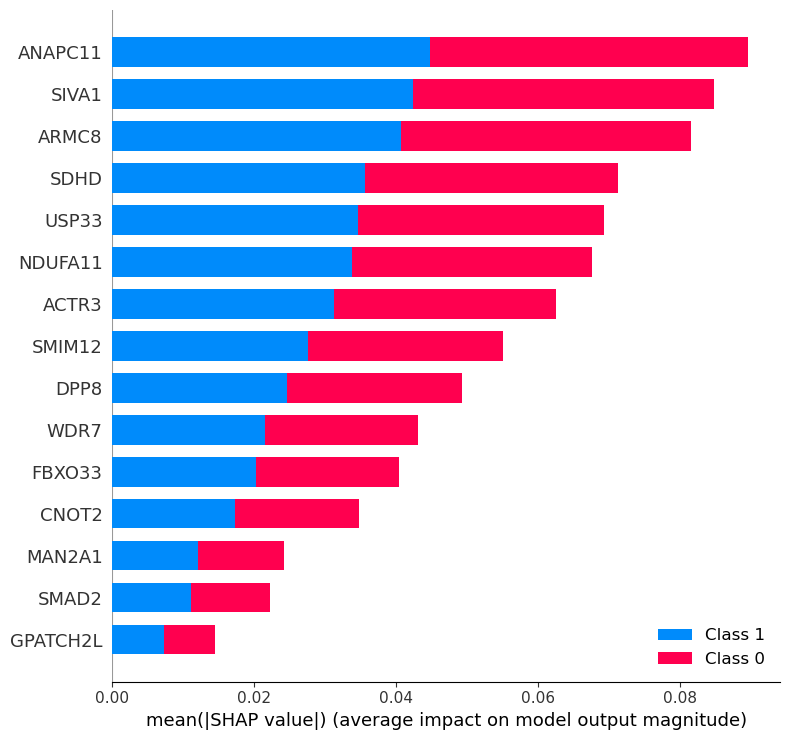

In [8]:
import shap

# Create a SHAP explainer object
explainer = shap.Explainer(rf_classifier)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_selected)

# Create a summary plot of SHAP values
shap.summary_plot(shap_values, X_test_selected, feature_names=selected_feature_names)

AUC-ROC: 0.8199503311258278


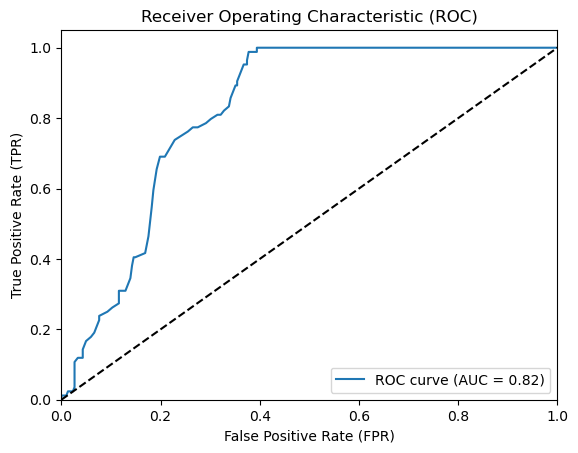

In [9]:
import matplotlib.pyplot as plt

# Calculate the probabilities for the positive class
y_pred_prob = rf_classifier.predict_proba(X_test_selected)[:, 1]
# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)
print("AUC-ROC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [10]:
temp = df_concat_filtered[list(selected_feature_names)]

new_data = {}
for i in range(0, temp.shape[1]-1):
    for j in range(i+1, temp.shape[1]):
        new_data.update({temp.columns[i]+'-'+temp.columns[j]: [1 if row[i] > row[j] else 0 for row in temp.values]})
df_concat_filtered_binary = pd.concat([df_concat_filtered[['SampleID']].reset_index(drop=True), pd.DataFrame(new_data)], axis=1)
df_concat_filtered_binary

,SampleID,ACTR3-ANAPC11,ACTR3-ARMC8,ACTR3-CNOT2,ACTR3-DPP8,ACTR3-FBXO33,ACTR3-GPATCH2L,ACTR3-MAN2A1,ACTR3-NDUFA11,ACTR3-SDHD,...,SIVA1-SMAD2,SIVA1-SMIM12,SIVA1-USP33,SIVA1-WDR7,SMAD2-SMIM12,SMAD2-USP33,SMAD2-WDR7,SMIM12-USP33,SMIM12-WDR7,USP33-WDR7
0,P001_100,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
1,P001_101,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,0,1
2,P001_102,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,1,1
3,P001_103,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,1,1,0,0,1
4,P001_104,1,1,1,1,1,1,1,1,1,...,0,0,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,SRR18720381,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
1547,SRR18720382,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,0,1,1
1548,SRR18720386,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
1549,SRR18720387,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1


In [11]:
temp = df_ibd_UC_filtered[list(selected_feature_names)]

new_data = {}
for i in range(0, temp.shape[1]-1):
    for j in range(i+1, temp.shape[1]):
        new_data.update({temp.columns[i]+'-'+temp.columns[j]: [1 if row[i] > row[j] else 0 for row in temp.values]})
df_ibd_UC_filtered_binary = pd.concat([df_ibd_UC_filtered[['SampleID']].reset_index(drop=True), pd.DataFrame(new_data)], axis=1)
df_ibd_UC_filtered_binary

,SampleID,ACTR3-ANAPC11,ACTR3-ARMC8,ACTR3-CNOT2,ACTR3-DPP8,ACTR3-FBXO33,ACTR3-GPATCH2L,ACTR3-MAN2A1,ACTR3-NDUFA11,ACTR3-SDHD,...,SIVA1-SMAD2,SIVA1-SMIM12,SIVA1-USP33,SIVA1-WDR7,SMAD2-SMIM12,SMAD2-USP33,SMAD2-WDR7,SMIM12-USP33,SMIM12-WDR7,USP33-WDR7
0,SRR18719361,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
1,SRR18719364,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,1
2,SRR18719365,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
3,SRR18719369,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
4,SRR18719370,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,SRR18720379,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,0,1
374,SRR18720380,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,0,1,1
375,SRR18720383,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,1,1,0,1,1
376,SRR18720385,1,1,1,1,1,1,1,1,1,...,0,1,0,1,1,0,1,0,0,1


In [12]:
temp = pd.concat([df_concat_filtered_binary, df_ibd_UC_filtered_binary], axis=0).iloc[:,1:]
X = temp.values
y = np.concatenate((np.zeros(len(df_concat_filtered_binary)), np.ones(len(df_ibd_UC_filtered_binary))))

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class in the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Perform feature selection using SelectKBest with f_classif scoring function
k = 100  # Number of top features to select
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names_genepair = temp.columns[selected_feature_indices]

# Create a random forest classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier using the selected features and resampled training data
rf_classifier.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set using the selected features
y_pred = rf_classifier.predict(X_test_selected)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the names of the selected features
print("Selected Features:")
print(selected_feature_names_genepair)

Features [  1   2   3   4   5   6   8  10  11  13  49  78  92  94 104] are constant.
invalid value encountered in divide


Accuracy: 0.7305699481865285
Selected Features:
Index(['ACTR3-ANAPC11', 'ACTR3-MAN2A1', 'ACTR3-NDUFA11', 'ACTR3-SDHD',
       'ACTR3-SIVA1', 'ACTR3-SMAD2', 'ACTR3-SMIM12', 'ACTR3-USP33',
       'ACTR3-WDR7', 'ANAPC11-ARMC8', 'ANAPC11-CNOT2', 'ANAPC11-DPP8',
       'ANAPC11-FBXO33', 'ANAPC11-GPATCH2L', 'ANAPC11-MAN2A1',
       'ANAPC11-NDUFA11', 'ANAPC11-SDHD', 'ANAPC11-SIVA1', 'ANAPC11-SMAD2',
       'ANAPC11-SMIM12', 'ANAPC11-USP33', 'ANAPC11-WDR7', 'ARMC8-CNOT2',
       'ARMC8-DPP8', 'ARMC8-FBXO33', 'ARMC8-GPATCH2L', 'ARMC8-MAN2A1',
       'ARMC8-NDUFA11', 'ARMC8-SDHD', 'ARMC8-SIVA1', 'ARMC8-SMAD2',
       'ARMC8-SMIM12', 'ARMC8-USP33', 'ARMC8-WDR7', 'CNOT2-DPP8',
       'CNOT2-FBXO33', 'CNOT2-GPATCH2L', 'CNOT2-MAN2A1', 'CNOT2-NDUFA11',
       'CNOT2-SDHD', 'CNOT2-SIVA1', 'CNOT2-SMAD2', 'CNOT2-SMIM12',
       'CNOT2-USP33', 'CNOT2-WDR7', 'DPP8-FBXO33', 'DPP8-GPATCH2L',
       'DPP8-MAN2A1', 'DPP8-NDUFA11', 'DPP8-SDHD', 'DPP8-SIVA1', 'DPP8-SMAD2',
       'DPP8-SMIM12', 'DPP8-USP33', '

In [13]:
selected_feature_names

Index(['ACTR3', 'ANAPC11', 'ARMC8', 'CNOT2', 'DPP8', 'FBXO33', 'GPATCH2L',
       'MAN2A1', 'NDUFA11', 'SDHD', 'SIVA1', 'SMAD2', 'SMIM12', 'USP33',
       'WDR7'],
      dtype='object')

In [25]:
df_ibd_UC_test = pd.read_csv('../Transcriptomics reporting/ibd_UC_test transcriptomics.csv', sep=',')
df_ibd_CD_test = pd.read_csv('../Transcriptomics reporting/ibd_CD_test transcriptomics.csv', sep=',')

temp = df_ibd_UC_test[list(selected_feature_names)]
new_data = {}
for i in range(0, temp.shape[1]-1):
    for j in range(i+1, temp.shape[1]):
        new_data.update({temp.columns[i]+'-'+temp.columns[j]: [1 if row[i] > row[j] else 0 for row in temp.values]})
df_ibd_UC_test_binary = pd.concat([df_ibd_UC_test[['SampleID']].reset_index(drop=True), pd.DataFrame(new_data)], axis=1)

temp = df_ibd_CD_test[list(selected_feature_names)]
new_data = {}
for i in range(0, temp.shape[1]-1):
    for j in range(i+1, temp.shape[1]):
        new_data.update({temp.columns[i]+'-'+temp.columns[j]: [1 if row[i] > row[j] else 0 for row in temp.values]})
df_ibd_CD_test_binary = pd.concat([df_ibd_CD_test[['SampleID']].reset_index(drop=True), pd.DataFrame(new_data)], axis=1)

In [32]:
X_independent_test = pd.concat([df_ibd_UC_test_binary[selected_feature_names_genepair], df_ibd_CD_test_binary[selected_feature_names_genepair]], axis=0).values
y_independent_test = np.concatenate((np.ones(len(df_ibd_UC_test_binary)), np.zeros(len(df_ibd_CD_test_binary))))

In [33]:
# Make predictions on the test set using the selected features
y_independent_pred = rf_classifier.predict(X_independent_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_independent_test, y_independent_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [35]:
y_independent_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [36]:
y_independent_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])